In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
data=pd.read_csv("Fraud_check.csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
colnames=(data.columns)

In [5]:
num=data['Taxable.Income']


In [6]:
data['Status']=np.where(num<=30000,'risky','good')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [7]:
data.dtypes


Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
Status             object
dtype: object

In [8]:
data.Status.value_counts()

good     476
risky    124
Name: Status, dtype: int64

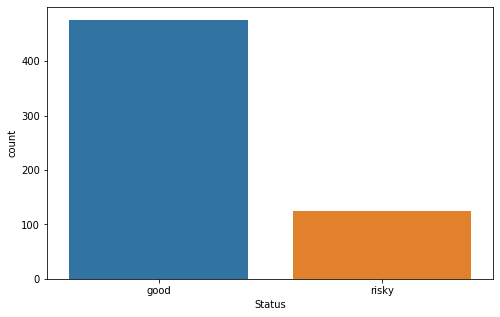

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data.Status)
plt.show()

In [10]:
df = data.drop(["Taxable.Income"],axis=1)

In [11]:
df.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Status
0,NO,Single,50047,10,YES,good
1,YES,Divorced,134075,18,YES,good


In [12]:
df.shape

(600, 6)

In [13]:
#Count of duplicated rows
df[df.duplicated()].shape

(0, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Status           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [15]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


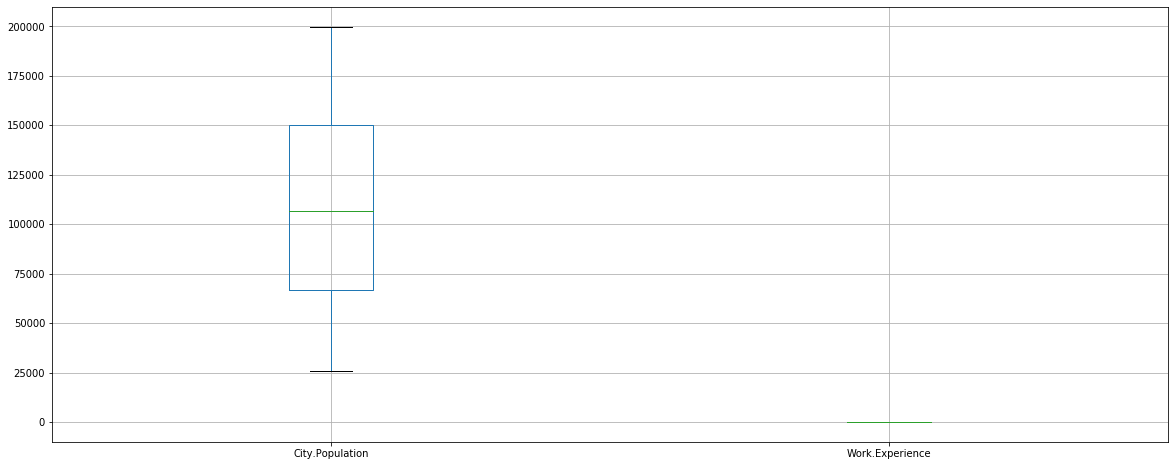

In [16]:
plt.figure(figsize=(20,8))
df.boxplot()

In [17]:
X = df.drop(["Status"],axis=1)
Y = df.Status

In [18]:
X.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES


In [19]:
X = pd.get_dummies(X,drop_first=True)

In [20]:
X.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [21]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
# Normalized data frame (considering the numerical part of data)
X = norm_func(X)
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [23]:
#Y= Y.map({'good': 1, 'risky': 0})


**Splitting data into training and testing data set**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [25]:
from sklearn.tree import  DecisionTreeClassifier

model = DecisionTreeClassifier (criterion = 'gini')
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

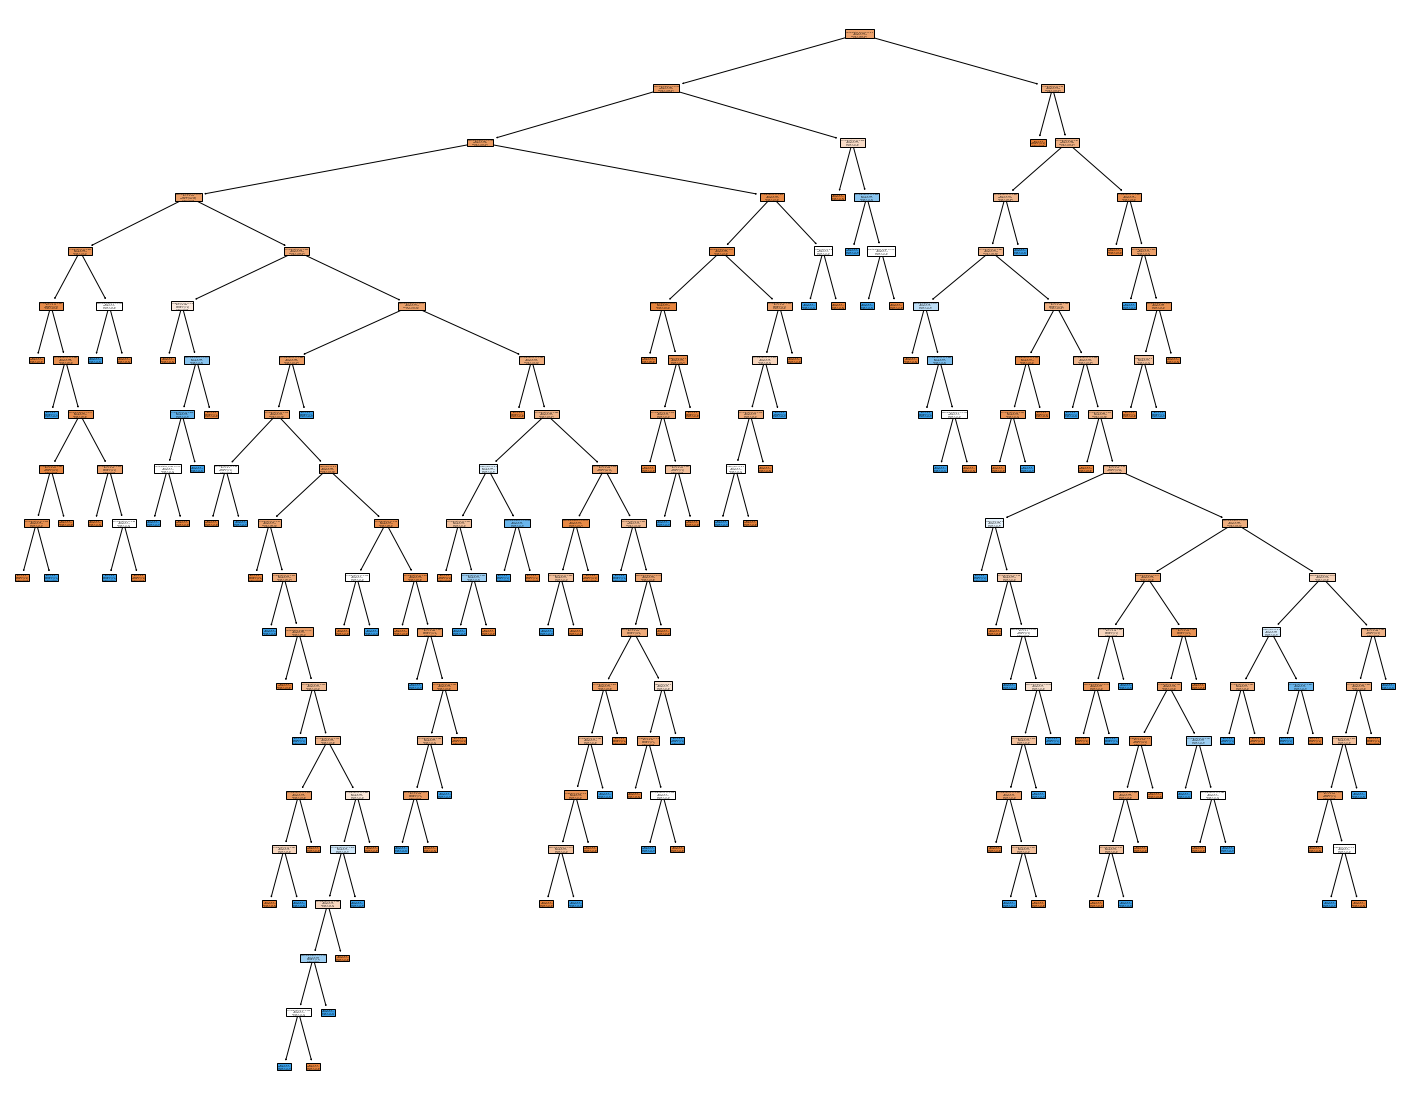

In [26]:
fn = X.columns
cn = ['good','risky']
plt.figure(figsize = (25,20))
tree.plot_tree(model,feature_names=fn,class_names=cn,filled = True);
plt.show()

In [27]:
model.get_n_leaves()

120

In [28]:
#Find the accuracy
model.score(X_test,Y_test)

0.7

In [29]:
model.score(X_train,Y_train)

1.0

In [30]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

good     122
risky     28
dtype: int64

In [31]:
preds

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky',
       'good', 'good', 'good', 'risky', 'risky', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'risky', 'risky', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'go

In [32]:
pd.crosstab(Y_test,preds)

col_0,good,risky
Status,,
good,97,20
risky,25,8


In [33]:
# Accuracy 
np.mean(preds==Y_test)

0.7

In [34]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

        good       0.80      0.83      0.81       117
       risky       0.29      0.24      0.26        33

    accuracy                           0.70       150
   macro avg       0.54      0.54      0.54       150
weighted avg       0.68      0.70      0.69       150



In [35]:
pred_train = model.predict(X_train)
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

        good       1.00      1.00      1.00       359
       risky       1.00      1.00      1.00        91

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



**Changing the max depth**

In [36]:
train_accuracy = []
test_accuracy = []
for depth in range (1,10):
    df_model = DecisionTreeClassifier (max_depth=depth,random_state = 22)
    df_model.fit(X_train,Y_train)
    train_accuracy.append(df_model.score(X_train,Y_train))
    test_accuracy.append(df_model.score(X_test,Y_test))

In [37]:
frame= pd.DataFrame({'max_depth':range(1,10),'Train_acc':train_accuracy,'Test_acc':test_accuracy})
frame.head()

,max_depth,Train_acc,Test_acc
0,1,0.797778,0.780000
1,2,0.797778,0.780000
2,3,0.804444,0.773333
3,4,0.808889,0.780000
4,5,0.817778,0.760000


No handles with labels found to put in legend.


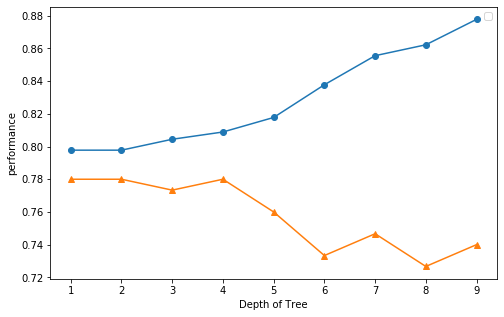

In [38]:
%matplotlib inline
plt.figure(figsize = (8,5))
plt.plot(frame["max_depth"],frame["Train_acc"],marker = 'o')
plt.plot(frame["max_depth"],frame["Test_acc"],marker = '^')
plt.xlabel('Depth of Tree')
plt.ylabel('performance')
plt.legend()
plt.show()


In [39]:
df_model = DecisionTreeClassifier (max_depth=4,random_state = 42)
df_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [40]:
df_model.score(X_test,Y_test)

0.78

In [41]:
df_model.score(X_train,Y_train)

0.8088888888888889

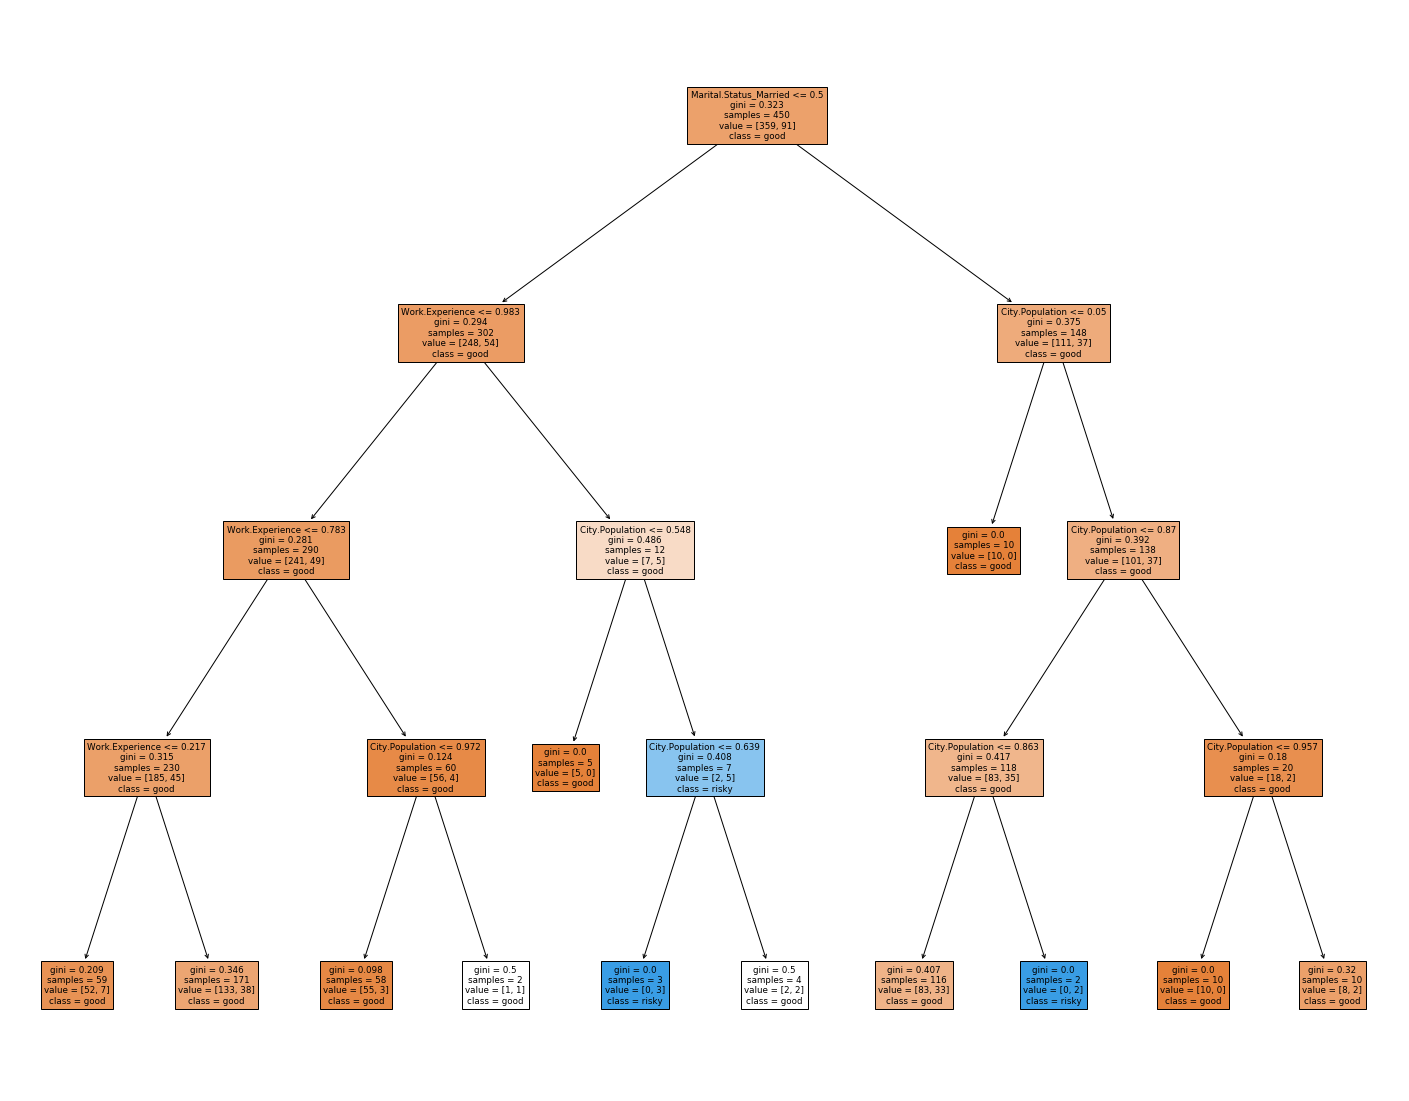

In [42]:
fn = X.columns
cn = ['good','risky']
plt.figure(figsize = (25,20))
tree.plot_tree(df_model,feature_names=fn,class_names=cn,filled = True);
plt.show()

# Pruning 

**Determining the best alpha**

In [43]:
path=model.cost_complexity_pruning_path(X_train,Y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00108796 0.00148148 0.00148148 0.00165837 0.00166667
 0.00169312 0.00177778 0.00177778 0.00177778 0.00185185 0.00190476
 0.00194444 0.00197446 0.00197531 0.002      0.00202469 0.00208333
 0.0020915  0.00213333 0.00222222 0.00222222 0.0022575  0.00231041
 0.00242424 0.00243388 0.00251852 0.0026455  0.00270159 0.00283389
 0.00293404 0.00296296 0.00309764 0.0031746  0.00322632 0.00380952
 0.00402732 0.00405663 0.00419772 0.00422656]
***********************************************************
Impurities in Decision Tree : [0.         0.00435185 0.01027778 0.01324074 0.02153257 0.0248659
 0.02655902 0.03011458 0.03367013 0.03900347 0.04270717 0.04651669
 0.05040558 0.0543545  0.05830511 0.06030511 0.0643545  0.06852116
 0.07270417 0.07697084 0.07919306 0.08141528 0.08367278 0.09753521
 0.09995945 0.11212885 0.12472144 0.12736694 0.14087488 0.15221046
 0.17274876 0.17867468 0.18486997 0.19121918 0.21057712 0.21438664
 0.22646861 0.24675173 0.

ccp_alphas gives minimum leaf value of decision tree and each ccp_aphas will create different - different classifier and choose best out of it.ccp_alphas will be added as a parameter in DecisionTreeClassifier() .

In [44]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,Y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.004226561479530831


In [45]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

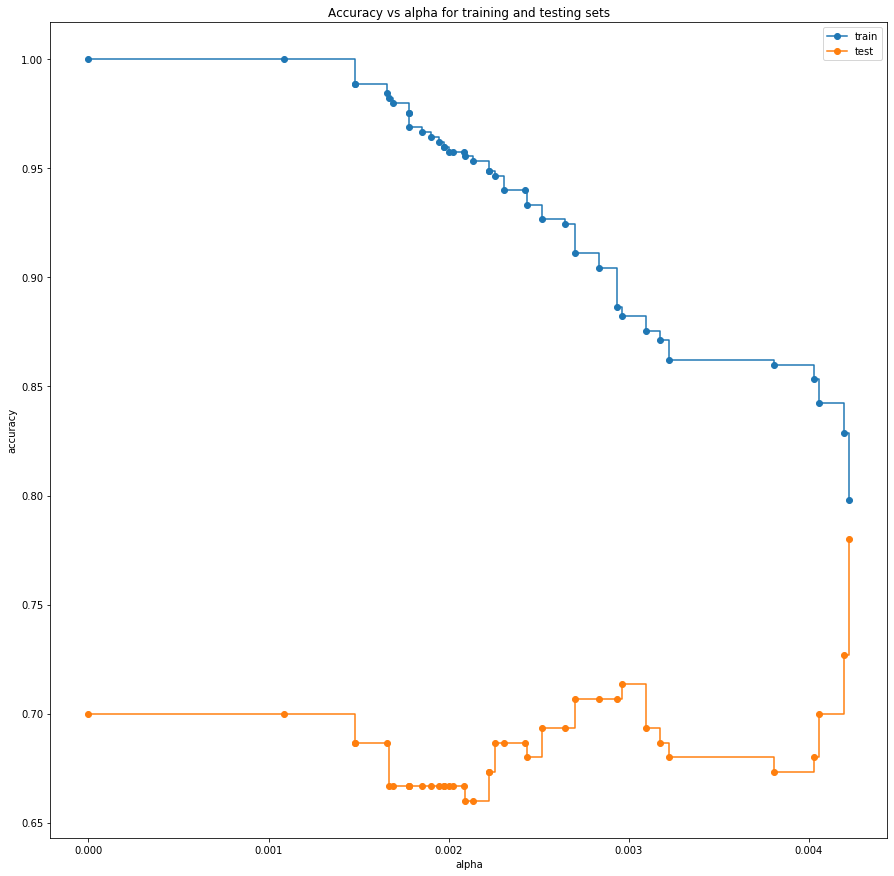

In [46]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score, KFold

In [48]:
alpha_values = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha =  ccp_alpha)
    scores = cross_val_score(tree, X_train, Y_train, cv = 10)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.688889,0.062063
1,0.001088,0.688889,0.062063
2,0.001481,0.691111,0.063983
3,0.001481,0.691111,0.063983
4,0.001658,0.697778,0.066071
5,0.001667,0.697778,0.066071
6,0.001693,0.697778,0.066071
7,0.001778,0.695556,0.068889
8,0.001778,0.695556,0.068889
9,0.001778,0.695556,0.068889


In [75]:
alpha_ideal =  float(ccp_alphas[-1:])
alpha_ideal

0.004226561479530831

### Pruned Decision Tree

In [76]:
clf=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha_ideal)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.004226561479530831, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

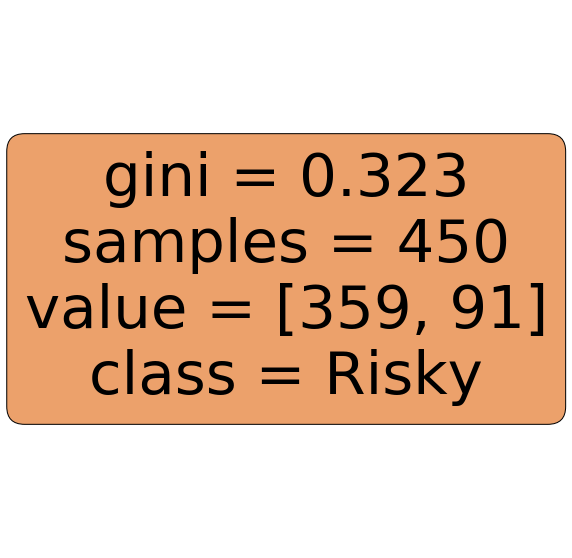

In [77]:

plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled = True, rounded = True, class_names = ['Risky', 'Good'], feature_names = X.columns)
plt.show()

In [78]:
clf.score(X_test,Y_test)

0.78

In [79]:
clf.score(X_train,Y_train)

0.7977777777777778

###  Hyperparameter tuning 

**GridSearchCV**

In [65]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [68]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 9, 'min_samples_split': 17, 'splitter': 'random'}


In [70]:
clf1=DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 9,min_samples_split=17,splitter= 'random')
clf1.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=17,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [72]:
clf1.score(X_test,Y_test)

0.78

In [73]:
clf1.score(X_train,Y_train)

0.7977777777777778